In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [3]:
data = pd.read_csv("/content/job_placement.csv" )
data.head()

,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
0,1,John Doe,Male,25,Bachelor's,Computer Science,Harvard University,Placed,60000,3.7,2.0
1,2,Jane Smith,Female,24,Bachelor's,Electrical Engineering,Massachusetts Institute of Technology,Placed,65000,3.6,1.0
2,3,Michael Johnson,Male,26,Bachelor's,Mechanical Engineering,Stanford University,Placed,58000,3.8,3.0
3,4,Emily Davis,Female,23,Bachelor's,Information Technology,Yale University,Not Placed,0,3.5,2.0
4,5,David Brown,Male,24,Bachelor's,Computer Science,Princeton University,Placed,62000,3.9,2.0


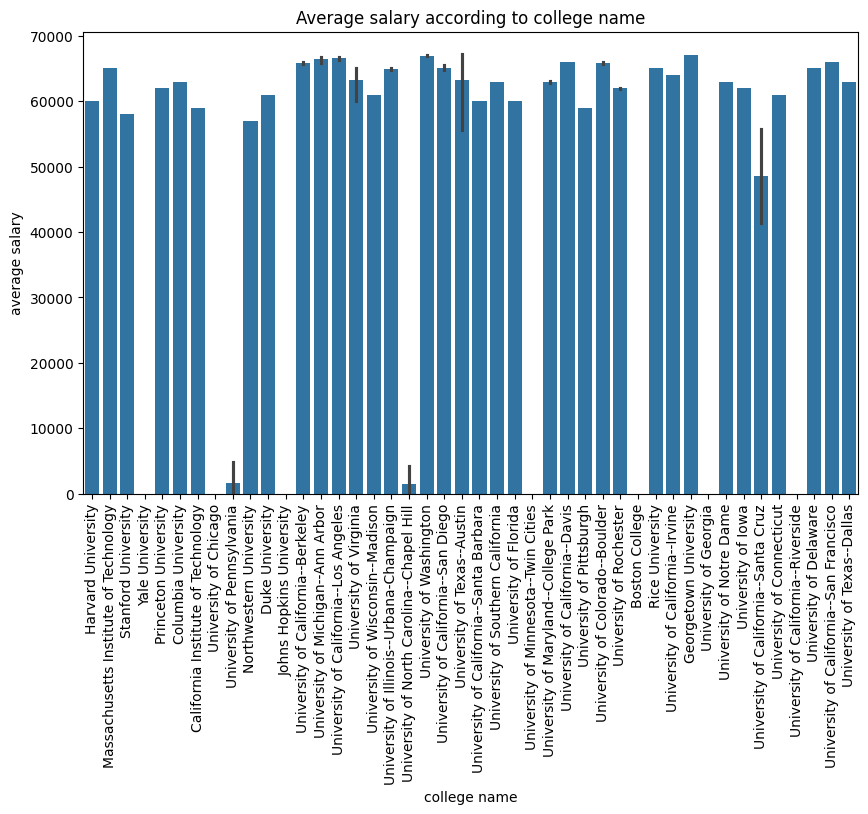

In [4]:
#lets se the average salary in collages

plt.figure(figsize=(10,6))
sns.barplot(x = 'college_name', y = 'salary', data=data)
plt.title('Average salary according to college name')
plt.xlabel('college name')
plt.ylabel('average salary')
plt.xticks(rotation=90)
plt.show()

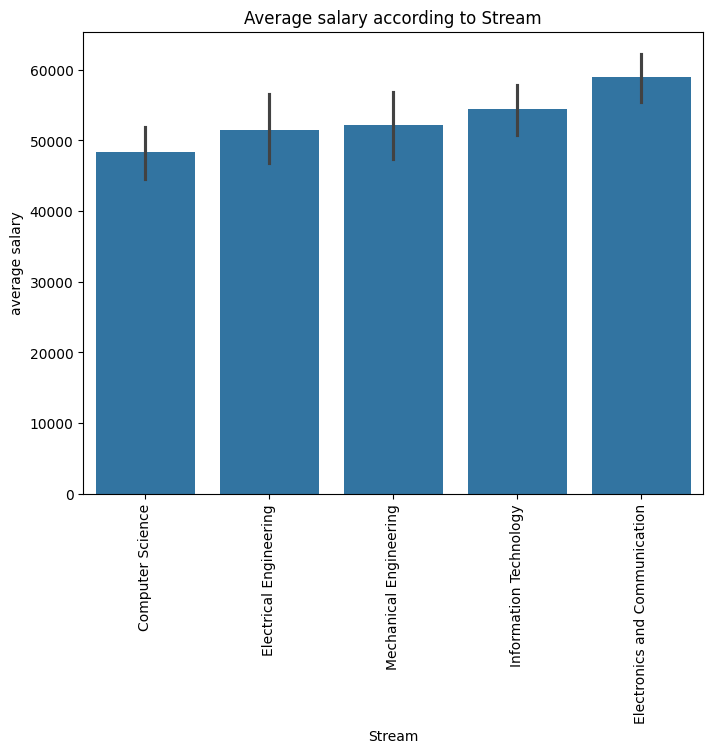

In [5]:
#creating a bar plot for average salary according to stream

plt.figure(figsize=(8,6))
sns.barplot(x = 'stream', y='salary',data=data)
plt.title('Average salary according to Stream')
plt.xlabel('Stream')
plt.ylabel('average salary')
plt.xticks(rotation=90)
plt.show()

In [6]:
#lets drop the non important column ( id,name)
data = data.drop(['id','name'],axis=1)

In [7]:
data.head()

,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
0,Male,25,Bachelor's,Computer Science,Harvard University,Placed,60000,3.7,2.0
1,Female,24,Bachelor's,Electrical Engineering,Massachusetts Institute of Technology,Placed,65000,3.6,1.0
2,Male,26,Bachelor's,Mechanical Engineering,Stanford University,Placed,58000,3.8,3.0
3,Female,23,Bachelor's,Information Technology,Yale University,Not Placed,0,3.5,2.0
4,Male,24,Bachelor's,Computer Science,Princeton University,Placed,62000,3.9,2.0


In [8]:
data.isnull().sum()

gender                 0
age                    0
degree                 0
stream                 0
college_name           0
placement_status       0
salary                 0
gpa                    0
years_of_experience    1
dtype: int64

In [9]:
data = data.dropna(subset=['years_of_experience'])

In [10]:
data.isnull().sum()

gender                 0
age                    0
degree                 0
stream                 0
college_name           0
placement_status       0
salary                 0
gpa                    0
years_of_experience    0
dtype: int64

In [11]:
data['degree'].value_counts()

Bachelor's    699
Name: degree, dtype: int64

In [12]:
data = data.drop('degree', axis=1)

In [13]:
data

,gender,age,stream,college_name,placement_status,salary,gpa,years_of_experience
0,Male,25,Computer Science,Harvard University,Placed,60000,3.7,2.0
1,Female,24,Electrical Engineering,Massachusetts Institute of Technology,Placed,65000,3.6,1.0
2,Male,26,Mechanical Engineering,Stanford University,Placed,58000,3.8,3.0
3,Female,23,Information Technology,Yale University,Not Placed,0,3.5,2.0
4,Male,24,Computer Science,Princeton University,Placed,62000,3.9,2.0
...,...,...,...,...,...,...,...,...
695,Male,23,Computer Science,University of Washington,Placed,67000,3.8,3.0
696,Female,26,Electronics and Communication,University of California--Berkeley,Placed,66000,3.9,3.0
697,Male,24,Computer Science,University of Illinois--Urbana-Champaign,Placed,65000,3.8,3.0
698,Female,23,Electrical Engineering,University of Colorado--Boulder,Placed,66000,3.7,2.0


In [14]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

columns_encode = ['stream','college_name','gender','placement_status']

for column in columns_encode:
  data[column+'_enocded'] = labelEncoder.fit_transform(data[column])




In [15]:
data.head()

,gender,age,stream,college_name,placement_status,salary,gpa,years_of_experience,stream_enocded,college_name_enocded,gender_enocded,placement_status_enocded
0,Male,25,Computer Science,Harvard University,Placed,60000,3.7,2.0,0,5,1,1
1,Female,24,Electrical Engineering,Massachusetts Institute of Technology,Placed,65000,3.6,1.0,1,7,0,1
2,Male,26,Mechanical Engineering,Stanford University,Placed,58000,3.8,3.0,4,11,1,1
3,Female,23,Information Technology,Yale University,Not Placed,0,3.5,2.0,3,43,0,0
4,Male,24,Computer Science,Princeton University,Placed,62000,3.9,2.0,0,9,1,1


In [29]:
data = data.drop(columns=columns_encode)
data

,age,salary,gpa,years_of_experience,stream_enocded,college_name_enocded,gender_enocded,placement_status_enocded
0,25,60000,3.7,2.0,0,5,1,1
1,24,65000,3.6,1.0,1,7,0,1
2,26,58000,3.8,3.0,4,11,1,1
3,23,0,3.5,2.0,3,43,0,0
4,24,62000,3.9,2.0,0,9,1,1
...,...,...,...,...,...,...,...,...
695,23,67000,3.8,3.0,0,41,1,1
696,26,66000,3.9,3.0,2,12,0,1
697,24,65000,3.8,3.0,0,27,1,1
698,23,66000,3.7,2.0,1,22,0,1


In [30]:
data = data.reindex(columns = [ col for col in data.columns if col!='salary']+['salary'])
data.head()

,age,gpa,years_of_experience,stream_enocded,college_name_enocded,gender_enocded,placement_status_enocded,salary
0,25,3.7,2.0,0,5,1,1,60000
1,24,3.6,1.0,1,7,0,1,65000
2,26,3.8,3.0,4,11,1,1,58000
3,23,3.5,2.0,3,43,0,0,0
4,24,3.9,2.0,0,9,1,1,62000


In [31]:
data.describe()

,age,gpa,years_of_experience,stream_enocded,college_name_enocded,gender_enocded,placement_status_enocded,salary
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,24.412017,3.750501,2.177396,1.759657,27.078684,0.477825,0.814020,52463.519313
std,1.164998,0.121283,0.779393,1.475503,9.281237,0.499866,0.389369,25176.734034
min,23.000000,3.400000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,3.700000,2.000000,0.000000,20.000000,0.000000,1.000000,61000.000000
50%,24.000000,3.800000,2.000000,2.000000,27.000000,0.000000,1.000000,64000.000000
75%,26.000000,3.900000,3.000000,3.000000,34.000000,1.000000,1.000000,66000.000000
max,26.000000,3.900000,3.000000,4.000000,43.000000,1.000000,1.000000,68000.000000


In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


In [33]:
df = scaler.fit_transform(data)
x = df[:,:-1]
y = df[:,-1]

In [34]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.20 , random_state = 42)

In [36]:
model = LinearRegression()
model.fit(x_train,y_train)

yhat = model.predict(x_test)

mse = mean_squared_error(y_test,yhat)
print("The Mean Squared Error of Linear Regression :",mse)


The Mean Squared Error of Linear Regression : 0.0007771470151545957


In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [40]:
def training(model):
  model.fit(x_train,y_train)
  yhat = model.predict(x_test)
  mse = mean_squared_error(y_test,yhat)
  r2 = r2_score(y_test,yhat)
  print("The MSE of {} : ".format(model), mse)
  print("The R2_score of {} : ".format(model), r2)


In [41]:
RandomForestRegressor_model = RandomForestRegressor()
AdaBoostRegressor_model = AdaBoostRegressor()
GradientBoostingRegressor_model = GradientBoostingRegressor()
ExtraTreesRegressor_model = ExtraTreesRegressor()

lst = [RandomForestRegressor_model,AdaBoostRegressor_model,GradientBoostingRegressor_model,ExtraTreesRegressor_model]
for i in lst:
  training(i)
  print('-'*50)


The MSE of RandomForestRegressor() :  0.0002337406965009326
The R2_score of RandomForestRegressor() :  0.9984551087111456
--------------------------------------------------
The MSE of AdaBoostRegressor() :  0.0005585701639686056
The R2_score of AdaBoostRegressor() :  0.9963081731446555
--------------------------------------------------
The MSE of GradientBoostingRegressor() :  0.00021507581633224088
The R2_score of GradientBoostingRegressor() :  0.9985784728116714
--------------------------------------------------
The MSE of ExtraTreesRegressor() :  0.00023874135913555856
The R2_score of ExtraTreesRegressor() :  0.998422057213232
--------------------------------------------------
